In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [3]:
crabdata = pd.read_csv("C:/Users/User/Documents/UNI/3rd year/semester 2/ML/Project 1/CrabAgePrediction.csv")

In [4]:
crabdata.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [5]:
crabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [6]:
#remove height=0
crabdata = crabdata[crabdata['Height'] > 0]

In [7]:
crabdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3891 non-null   object 
 1   Length          3891 non-null   float64
 2   Diameter        3891 non-null   float64
 3   Height          3891 non-null   float64
 4   Weight          3891 non-null   float64
 5   Shucked Weight  3891 non-null   float64
 6   Viscera Weight  3891 non-null   float64
 7   Shell Weight    3891 non-null   float64
 8   Age             3891 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 304.0+ KB


In [8]:
# Factorize the 'Sex' column
crabdata['Sex'] = pd.factorize(crabdata['Sex'])[0]

# If you want to change the numerical encoding to specific labels:
sex_labels = {0: 'Female', 1: 'Male', 2: 'Indeterminate'}  # Define the labels
crabdata['Sex'] = crabdata['Sex'].map(sex_labels)

# Show the first few rows of the DataFrame to verify the changes
print(crabdata.head())
crabdata.info()

             Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0         Female  1.4375    1.1750  0.4125  24.635715       12.332033   
1           Male  0.8875    0.6500  0.2125   5.400580        2.296310   
2  Indeterminate  1.0375    0.7750  0.2500   7.952035        3.231843   
3         Female  1.1750    0.8875  0.2500  13.480187        4.748541   
4  Indeterminate  0.8875    0.6625  0.2125   6.903103        3.458639   

   Viscera Weight  Shell Weight  Age  
0        5.584852      6.747181    9  
1        1.374951      1.559222    6  
2        1.601747      2.764076    6  
3        2.282135      5.244657   10  
4        1.488349      1.700970    6  
<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3891 non-null   object 
 1   Length          3891 non-null   float64
 2   Diameter        3891 non-null   float64
 

In [9]:
#data on different scales. so we standardize
from sklearn.preprocessing import StandardScaler
#split data to features and label by making a copy of each
X=crabdata[["Sex","Length","Diameter","Height","Weight","Shucked Weight", "Viscera Weight","Shell Weight"]].copy()
Y=crabdata["Age"].copy()

In [10]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,Female,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,Male,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,Indeterminate,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,Female,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,Indeterminate,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ["Sex"]
numerical_cols = ["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)
print(X_processed)

[[ 0.41953843  0.62039253  0.60126404 ...  1.          0.
   0.        ]
 [-1.41179319 -1.49529346 -1.3091317  ...  0.          0.
   1.        ]
 [-0.91233911 -0.9915587  -0.9509325  ...  0.          1.
   0.        ]
 ...
 [-2.28583783 -2.25089561 -1.78673064 ...  0.          1.
   0.        ]
 [-0.82909676 -0.9915587  -0.83153277 ...  0.          1.
   0.        ]
 [-1.74476257 -1.64641389 -1.3091317  ...  0.          1.
   0.        ]]


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_processed, Y, 
                                                    train_size=0.8, 
                                                    random_state=123)

In [13]:
from sklearn.neighbors import LocalOutlierFactor
# Outlier detection using Local Outlier Factor (LOF)
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
lof_outliers = lof_model.fit_predict(X_train_scaled)
lof_outliers_indices = np.where(lof_outliers == -1)[0]

# Print indices of outliers detected by LOF
print("Indices of outliers detected by LOF:", lof_outliers_indices)

# Count the number of outliers detected by LOF
num_outliers = len(lof_outliers_indices)
print("Number of outliers detected by LOF:", num_outliers)

Indices of outliers detected by LOF: [  21   23   33   43   53   68   71  102  135  137  139  145  154  169
  174  180  184  185  204  257  269  273  280  288  295  300  301  307
  311  319  321  323  334  347  350  378  394  405  410  426  444  464
  478  511  519  520  530  533  545  548  556  580  587  609  617  624
  630  632  634  640  647  651  665  667  672  688  689  694  698  699
  700  704  709  717  719  740  744  751  755  756  759  764  767  769
  776  779  799  826  854  859  866  877  878  880  881  905  913  941
  946  964  967  973  992  994 1027 1034 1037 1038 1039 1044 1053 1060
 1067 1083 1088 1100 1117 1120 1122 1133 1149 1152 1159 1166 1177 1182
 1186 1193 1226 1239 1248 1274 1279 1313 1369 1370 1392 1394 1398 1399
 1407 1419 1421 1432 1438 1446 1451 1456 1457 1480 1482 1489 1495 1498
 1512 1513 1528 1531 1539 1551 1554 1602 1607 1610 1617 1634 1643 1645
 1647 1649 1659 1664 1667 1671 1727 1740 1741 1756 1771 1792 1795 1809
 1842 1849 1864 1867 1878 1881 1886 1907

In [14]:
# Remove 312 outliers from X_train_scaled
X_train_scaled_cleaned = np.delete(X_train_scaled, lof_outliers_indices, axis=0)

# Adjust Y_train if needed
Y_train_cleaned = np.delete(Y_train, lof_outliers_indices, axis=0)

In [15]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Instantiate SVR
svr_model = SVR()

# Fit SVR to the cleaned training data
svr_model.fit(X_train_scaled_cleaned, Y_train_cleaned)

# Instantiate Ridge Regression
ridge_model = Ridge()

# Fit Ridge Regression to the cleaned training data
ridge_model.fit(X_train_scaled_cleaned, Y_train_cleaned)

# Instantiate Lasso Regression
lasso_model = Lasso()

# Fit Lasso Regression to the cleaned training data
lasso_model.fit(X_train_scaled_cleaned, Y_train_cleaned)

# Instantiate XGBoost
xgb_model = XGBRegressor()

# Fit XGBoost to the cleaned training data
xgb_model.fit(X_train_scaled_cleaned, Y_train_cleaned)

# Evaluate the models
# Example: Calculate mean squared error (MSE)
svr_predictions = svr_model.predict(X_train_scaled_cleaned)
svr_mse = mean_squared_error(Y_train_cleaned, svr_predictions)

ridge_predictions = ridge_model.predict(X_train_scaled_cleaned)
ridge_mse = mean_squared_error(Y_train_cleaned, ridge_predictions)

lasso_predictions = lasso_model.predict(X_train_scaled_cleaned)
lasso_mse = mean_squared_error(Y_train_cleaned, lasso_predictions)

xgb_predictions = xgb_model.predict(X_train_scaled_cleaned)
xgb_mse = mean_squared_error(Y_train_cleaned, xgb_predictions)

print("SVR MSE:", svr_mse)
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)
print("XGBoost MSE:", xgb_mse)

SVR MSE: 4.309870958729348
Ridge MSE: 4.39340859869163
Lasso MSE: 7.098287308386888
XGBoost MSE: 0.4679154369016192


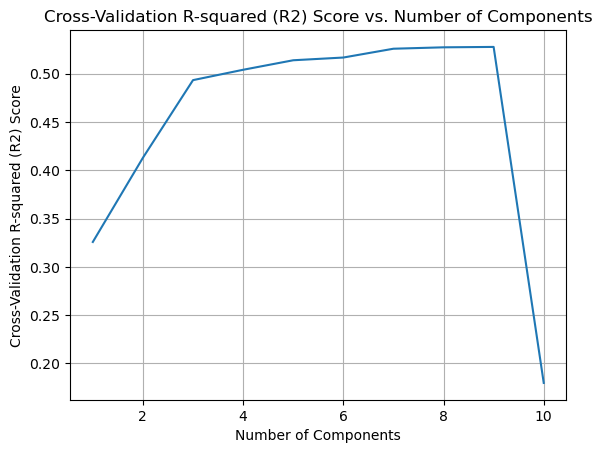

In [17]:
#PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

# Define PLS Regression with varying number of components
pls_model_cv = PLSRegression()

# Perform k-fold cross-validation with different number of components
components_range = range(1, 11)  # Try different numbers of components
cv_scores = []
for n_components in components_range:
    pls_model_cv.n_components = n_components
    scores = cross_val_score(pls_model_cv, X_train_scaled_cleaned, Y_train_cleaned, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores
plt.plot(components_range, cv_scores)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation R-squared (R2) Score')
plt.title('Cross-Validation R-squared (R2) Score vs. Number of Components')
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate PLS Regression
pls_model = PLSRegression(n_components=3) 

# Fit PLS Regression to the cleaned training data
pls_model.fit(X_train_scaled_cleaned, Y_train_cleaned)

# Predict on the cleaned training data
pls_predictions = pls_model.predict(X_train_scaled_cleaned)

# Evaluate the model
pls_mse = mean_squared_error(Y_train_cleaned, pls_predictions)
pls_r2 = r2_score(Y_train_cleaned, pls_predictions)

print("PLS Regression MSE:", pls_mse)
print("PLS Regression R-squared (R2) score:", pls_r2)

PLS Regression MSE: 4.735789313182253
PLS Regression R-squared (R2) score: 0.49580012948164576
